In [1]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
from scipy.optimize import curve_fit
from matplotlib.patches import Rectangle
from functools import reduce

In [2]:
f_mumu = uproot.open("/home/submit/jakedlee/FCCAnalyzer/output_h_bb.root")
print(f_mumu.keys())

['wzp6_ee_qqH_Hbb_ecm240;1', 'wzp6_ee_qqH_Hbb_ecm240/muons_all_p_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/muons_all_theta_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/muons_all_phi_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/muons_all_q_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/muons_all_no_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/electrons_all_p_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/electrons_all_theta_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/electrons_all_phi_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/electrons_all_q_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/electrons_all_no_cut0;1', 'wzp6_ee_qqH_Hbb_ecm240/cutFlow_mumu;1', 'wzp6_ee_qqH_Hbb_ecm240/cutFlow_ee;1', 'wzp6_ee_qqH_Hbb_ecm240/cutFlow_nunu;1', 'wzp6_ee_qqH_Hbb_ecm240/cutFlow_qq;1', 'wzp6_ee_qqH_Hbb_ecm240/cutFlow_ss;1', 'wzp6_ee_qqH_Hbb_ecm240/cutFlow_cc;1', 'wzp6_ee_qqH_Hbb_ecm240/cutFlow_bb;1', 'wzp6_ee_qqH_Hbb_ecm240/missingEnergy;1', 'wzp6_ee_qqH_Hbb_ecm240/cosThetaMiss_nOne;1', 'wzp6_ee_qqH_Hbb_ecm240/mumu_recoil_m_nOne;1', 'wzp6_ee_qqH_Hbb_ecm240/ee_recoil_m_nOne;1', 'wzp6_ee_qqH_Hbb_ecm240/mumu_p

The histograms are saved as `process_name/histogram_name`. We have two processes here corresponding to two different generators (Whizard and KKMC) that produces events of Z->mumu. Let's plot the cos(theta_c) distribution for both generators:

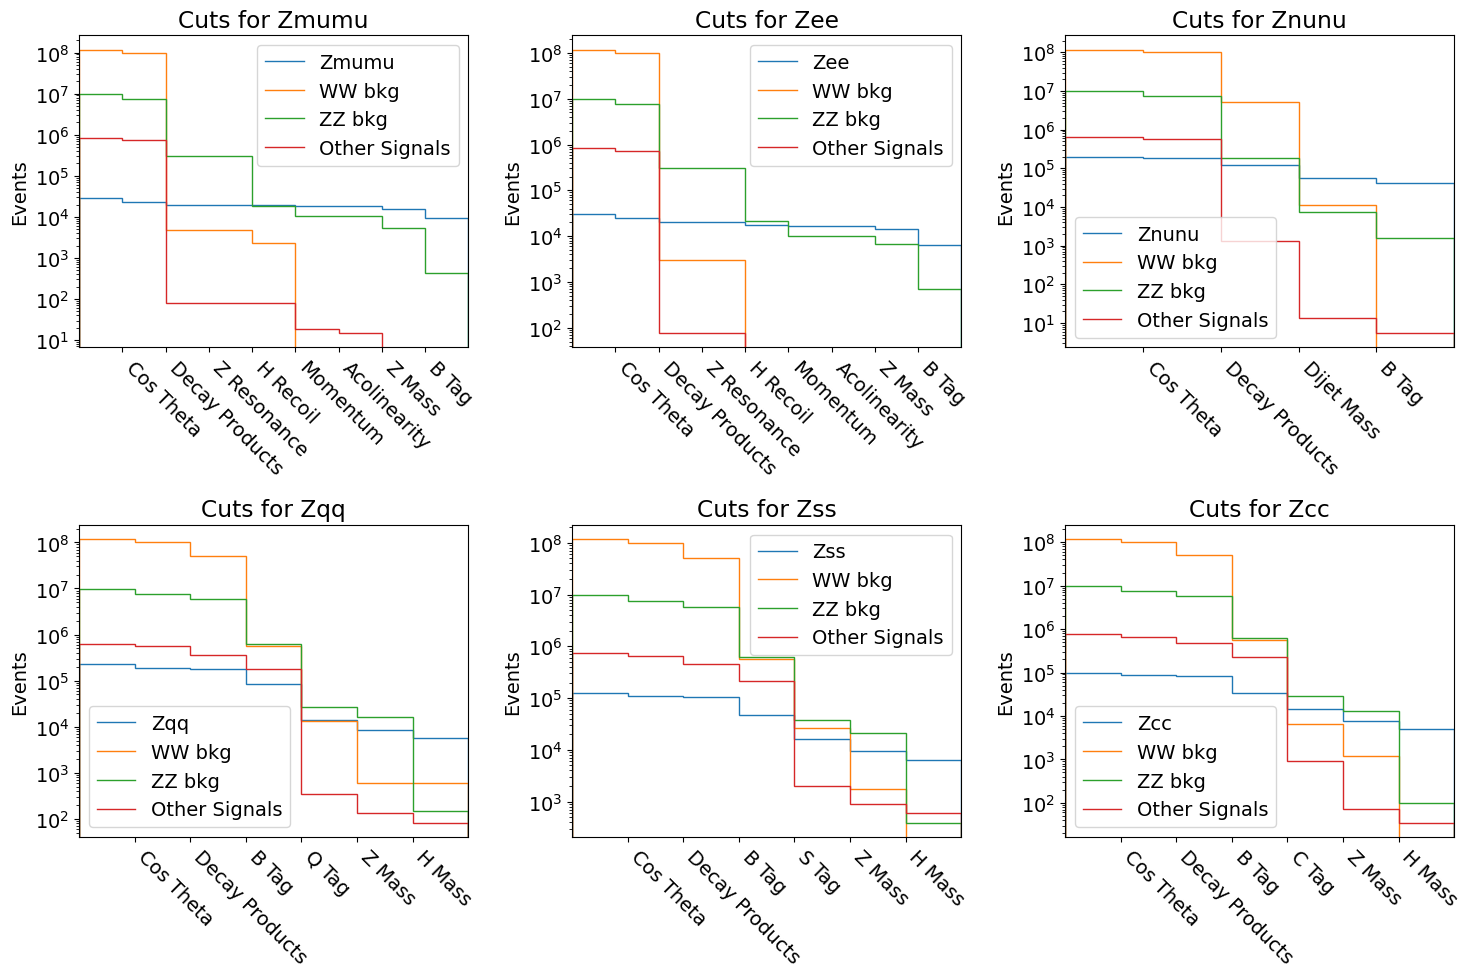

In [6]:
analyses = ['mumu', 'ee', 'nunu', 'qq', 'ss', 'cc']

Zprods = ['ee', 'mumu', 'tautau', 'nunu', 'qq', 'ss', 'cc', 'bb']
bb_sig = [f'wzp6_ee_{i}H_Hbb_ecm240' for i in Zprods]
cc_sig = [f'wzp6_ee_{i}H_Hcc_ecm240' for i in Zprods]

cols = 3
rows = int(np.ceil(len(analyses) / cols))

# for cut labels
cuts = {}
cuts['mumu'] = ['Cos Theta', 'Decay Products', 'Z Resonance', 'H Recoil', 'Momentum', 'Acolinearity', 'Z Mass', 'B Tag']
cuts['ee']   = ['Cos Theta', 'Decay Products', 'Z Resonance', 'H Recoil', 'Momentum', 'Acolinearity', 'Z Mass', 'B Tag']
cuts['nunu'] = ['Cos Theta', 'Decay Products', 'Dijet Mass', 'B Tag']
cuts['qq']   = ['Cos Theta', 'Decay Products', 'B Tag', 'Q Tag', 'Z Mass', 'H Mass']
cuts['ss']   = ['Cos Theta', 'Decay Products', 'B Tag', 'S Tag', 'Z Mass', 'H Mass']
cuts['cc']   = ['Cos Theta', 'Decay Products', 'B Tag', 'C Tag', 'Z Mass', 'H Mass']
cuts['bb']   = ['Cos Theta', 'Decay Products', 'B Tag']

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

for i in range(rows):
    for j in range(cols):
        if i*cols + j < len(analyses):
            p = analyses[i*cols + j]
        else:
            break
        part = f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        rest = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)])
        
        ax[i][j].stairs(part.values(), label=f'Z{p}')
        ax[i][j].stairs(WW.values(), label=f'WW bkg')
        ax[i][j].stairs(ZZ.values(), label=f'ZZ bkg')
        ax[i][j].stairs(rest.values(), label='Other Signals')
        
        ax[i][j].legend()
        ax[i][j].set_yscale('log')
        ax[i][j].set_title(f'Cuts for Z{p}')
        ax[i][j].set_ylabel('Events')
        ax[i][j].set_xlabel('')
        ax[i][j].set_xticks(ticks=list(range(1, len(cuts[p]) + 1)),
                   labels=cuts[p],
                   rotation=-45, ha='left')
        ax[i][j].set_xlim((0, maxi + 1))

plt.tight_layout()
plt.show()

Graph cuts specifically for Z->leps:

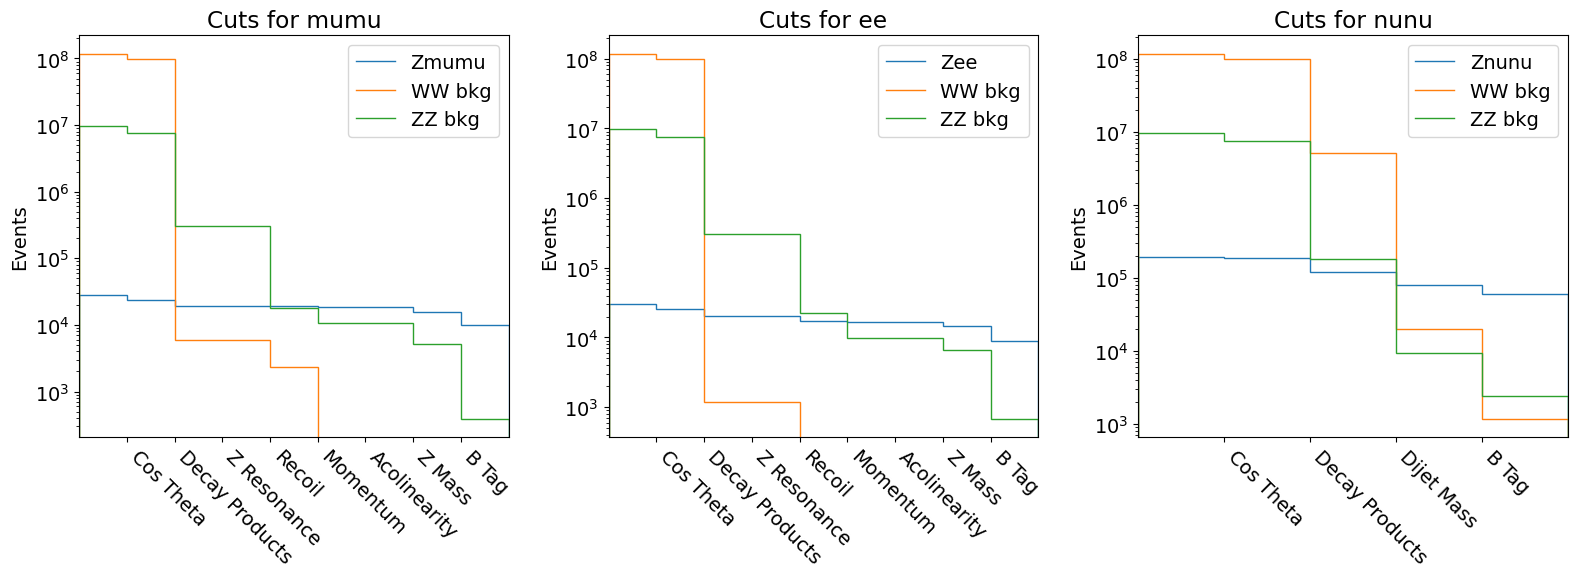

In [46]:
prods = ['mumu', 'ee', 'nunu', 'qq']

# for cut labels
cuts = {}
cuts['mumu'] = ['Cos Theta', 'Decay Products', 'Z Resonance', 'Recoil', 'Momentum', 'Acolinearity', 'Z Mass', 'B Tag']
cuts['ee']   = ['Cos Theta', 'Decay Products', 'Z Resonance', 'Recoil', 'Momentum', 'Acolinearity', 'Z Mass', 'B Tag']
cuts['nunu'] = ['Cos Theta', 'Decay Products', 'Dijet Mass', 'B Tag']

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 3, figsize=(16,6))

for i in range(3):
        p = prods[i]
        
        part = f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        
        ax[i].stairs(part.values(), label=f'Z{p}')
        ax[i].stairs(WW.values(), label=f'WW bkg')
        ax[i].stairs(ZZ.values(), label=f'ZZ bkg')
        
        ax[i].legend()
        ax[i].set_yscale('log')
        ax[i].set_title(f'ZH->{p}bb')
        ax[i].set_ylabel('Events')
        ax[i].set_xlabel('')
        ax[i].set_xticks(ticks=list(range(1, len(cuts[p]) + 1)),
                   labels=cuts[p],
                   rotation=-45, ha='left')
        ax[i].set_xlim((0, maxi + 1))

plt.suptitle('Cuts on Z->Leptons')
plt.tight_layout()
plt.show()

Graph cuts specifically for Z->quarks:

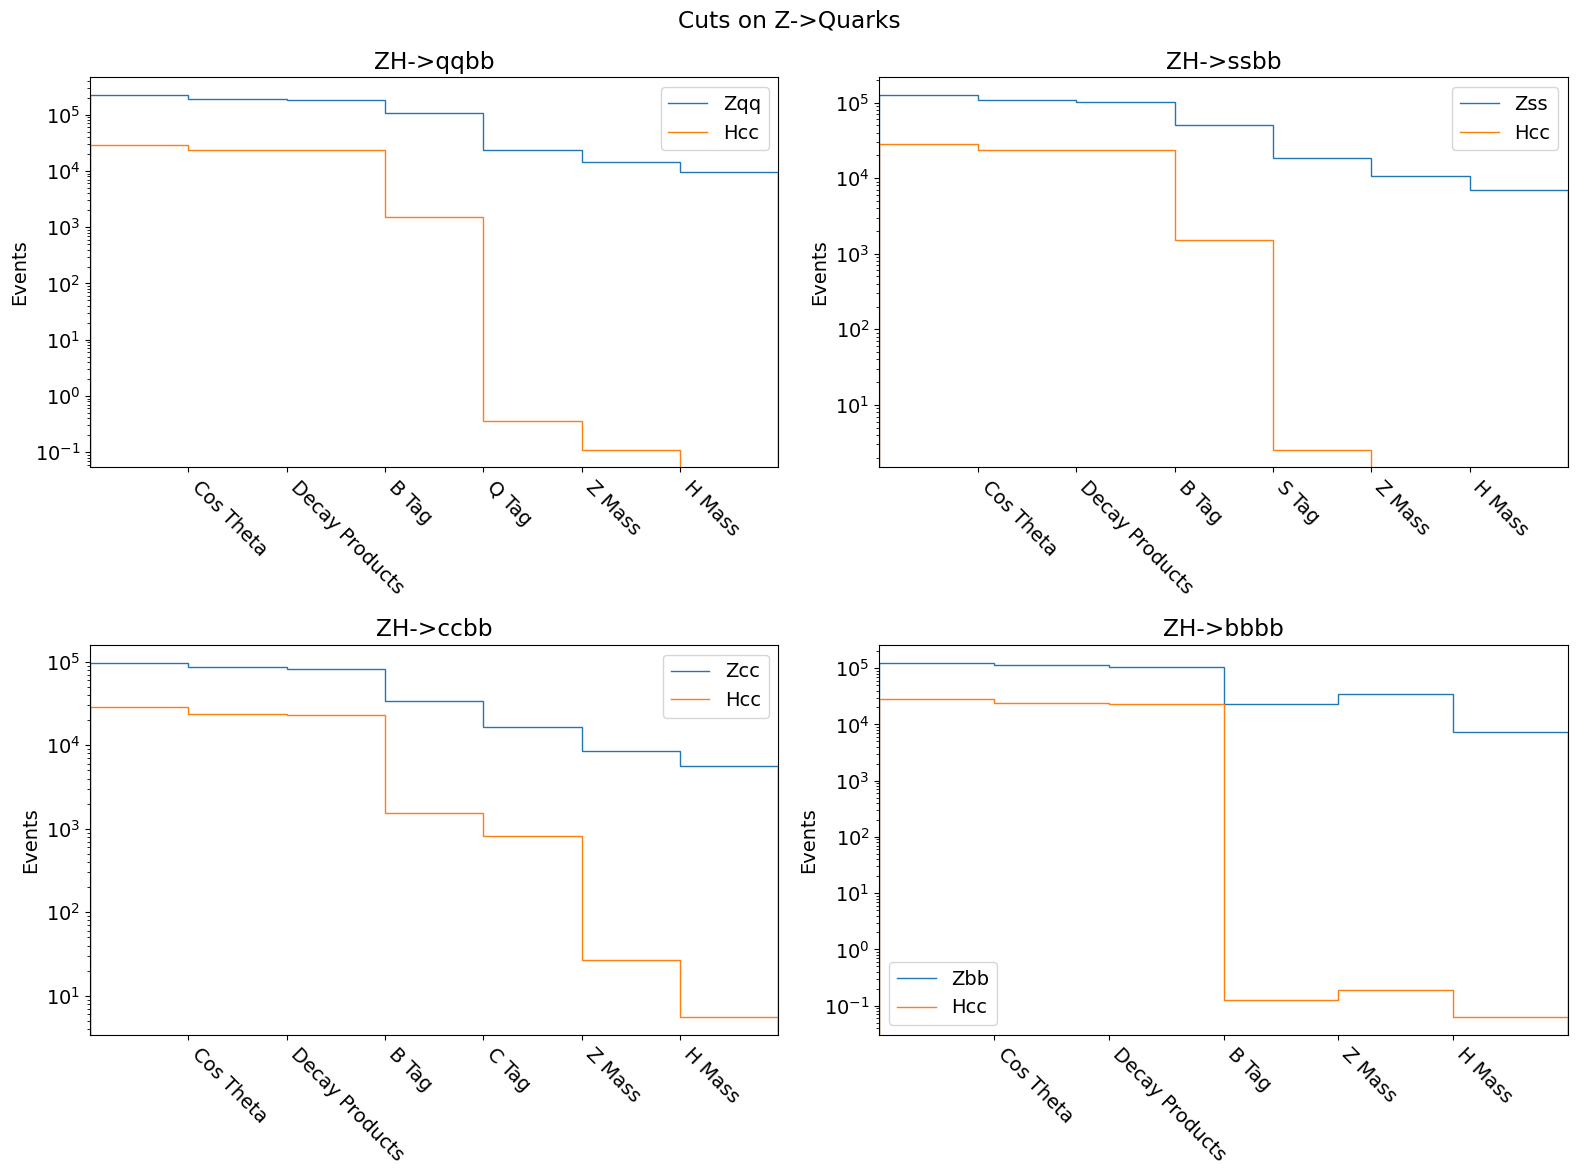

In [19]:
prods = ['qq', 'ss', 'cc', 'bb']

cc_sig = [f'wzp6_ee_{i}H_Hcc_ecm240' for i in prods]

# for cut labels
cuts = {}
cuts['qq']   = ['Cos Theta', 'Decay Products', 'B Tag', 'Q Tag', 'Z Mass', 'H Mass']
cuts['ss']   = ['Cos Theta', 'Decay Products', 'B Tag', 'S Tag', 'Z Mass', 'H Mass']
cuts['cc']   = ['Cos Theta', 'Decay Products', 'B Tag', 'C Tag', 'Z Mass', 'H Mass']
cuts['bb']   = ['Cos Theta', 'Decay Products', 'B Tag', 'Z Mass', 'H Mass']

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2, 2, figsize=(16,12))

for i in range(2):
    for j in range(2):
        p = prods[i*2 + j]
        
        part = f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        #WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        #ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        rest = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in cc_sig])
        
        ax[i][j].stairs(part.values(), label=f'Z{p}')
        #ax[i][j].stairs(WW.values(), label=f'WW bkg')
        #ax[i][j].stairs(ZZ.values(), label=f'ZZ bkg')
        ax[i][j].stairs(rest.values(), label=f'Hcc')
        
        ax[i][j].legend()
        ax[i][j].set_yscale('log')
        ax[i][j].set_title(f'ZH->{p}bb')
        ax[i][j].set_ylabel('Events')
        ax[i][j].set_xlabel('')
        ax[i][j].set_xticks(ticks=list(range(1, len(cuts[p]) + 1)),
                   labels=cuts[p],
                   rotation=-45, ha='left')
        ax[i][j].set_xlim((0, maxi + 1))

plt.suptitle('Cuts on Z->Quarks')
plt.tight_layout()
plt.show()

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


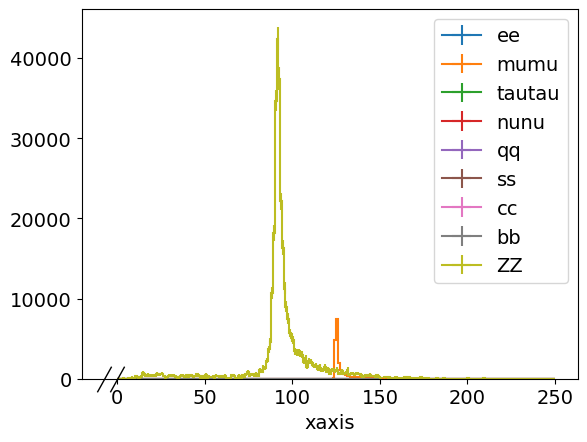

In [4]:
z_products = ['ee', 'mumu', 'tautau', 'nunu', 'qq', 'ss', 'cc', 'bb']

ZZ = f_mumu['p8_ee_ZZ_ecm240/mumu_recoil_m_nOne'].to_hist()
hists = [f_mumu[f'wzp6_ee_{i}H_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist() for i in z_products]
hists.append(ZZ)
z_products.append('ZZ')
hep.histplot(hists, label=z_products)#, stack=True)
#plt.xlim(115,140)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


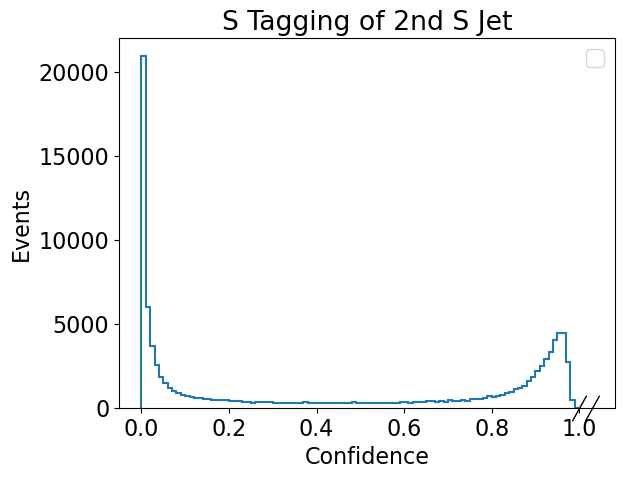

In [17]:
p = 'bb'
g = f'bprob_all'

mumu =  f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/{g}'].to_hist()
#WW   = f_mumu[f'p8_ee_WW_ecm240/{g}'].to_hist()
#ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/{g}'].to_hist()
#rest = reduce(lambda a, b : a + b, [f_mumu[x + f'/{g}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)])
plt.rcParams.update({'font.size': 16})
#hep.histplot([mumu, WW, ZZ, rest], label=[f'Z{p}', 'WW bkg', 'ZZ bkg', 'Other'], yerr=False)#, stack=True)
hep.histplot(mumu, yerr=False)
plt.legend()
plt.title("S Tagging of 2nd S Jet")
plt.ylabel("Events")
plt.xlabel("Confidence")
#plt.yscale('log')
#plt.xlim(80, 180)
plt.show()

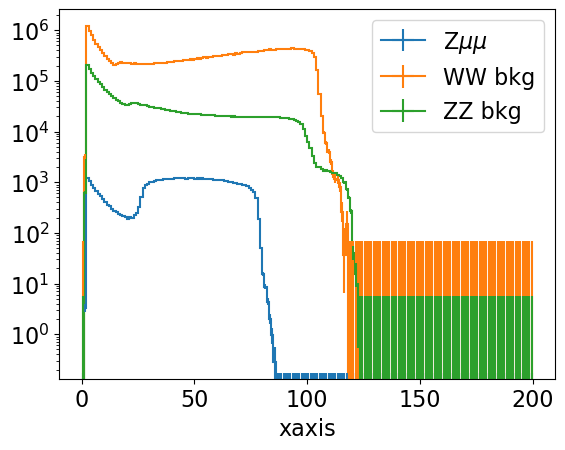

In [81]:
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/muons_all_p_cut0'].to_hist()
WW   = f_mumu['p8_ee_WW_ecm240/muons_all_p_cut0'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/muons_all_p_cut0'].to_hist()
hep.histplot([mumu, WW, ZZ], label=['Z$\mu\mu$', 'WW bkg', 'ZZ bkg'])#, stack=True)
plt.legend()
plt.yscale('log')
plt.show()

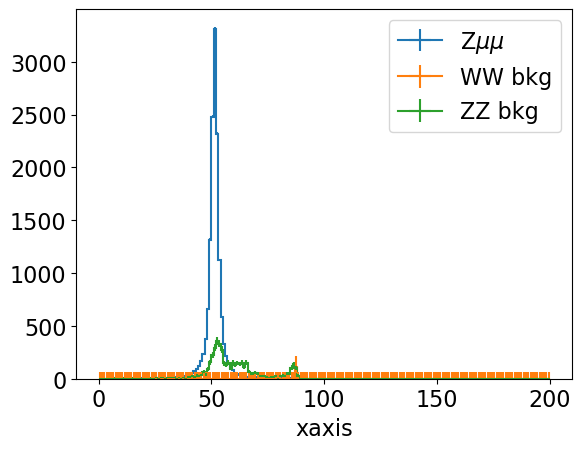

In [86]:
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_p_nOne'].to_hist()
WW   = f_mumu['p8_ee_WW_ecm240/mumu_p_nOne'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/mumu_p_nOne'].to_hist()
hep.histplot([mumu, WW, ZZ], label=['Z$\mu\mu$', 'WW bkg', 'ZZ bkg'])#, stack=True)
plt.legend()
plt.show()

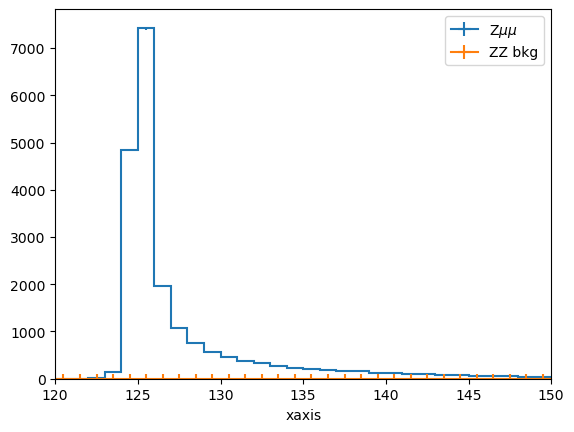

In [32]:
#zmumu_m_nOne
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist()
#ee   =  f_mumu['wzp6_ee_eeH_Hbb_ecm240/muons_all_p_cut0'].to_hist()
#WW   = f_mumu['p8_ee_WW_ecm240/muons_all_p_cut0'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/zmumu_m_nOne'].to_hist()
hep.histplot([mumu, ZZ], label=['Z$\mu\mu$', 'ZZ bkg'])
#hep.histplot(mumu, label='Z$\mu\mu$')
plt.legend()
plt.xlim((120,150))
#plt.ylim((0,50000))
#plt.yscale('log')
plt.show()

In [25]:
def xsec(decay_product):
    L = 7200000
    nums = f_mumu[f'wzp6_ee_{decay_product}H_Hbb_ecm240/cutFlow_{decay_product}'].values()
    maxi = np.nonzero(nums)[0][-1]
    A = 1 #nums[2] / nums[0]
    E = nums[maxi] / nums[0]
    Nsig = f_mumu[f'wzp6_ee_{decay_product}H_Hbb_ecm240/cutFlow_{decay_product}'].values()[maxi]
    Nbkg = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{decay_product}'].values()[maxi] + f_mumu[f'p8_ee_WW_ecm240/cutFlow_{decay_product}'].values()[maxi]
    Nobs = Nsig + Nbkg

    dNobs = np.sqrt(Nobs)
    dNbkg = np.sqrt(Nbkg)
    dA    = 0 #0.01*A
    dE    = 0.01*E
    dL    = 0.005*L
    dxsec = np.sqrt((dNobs/Nsig)**2 + (dNbkg/Nsig)**2 + (dA/A)**2 + (dE/E)**2 + (dL/L)**2)
    
    xsec = Nsig / (A*E*L)

    print("Acceptance:", A, "\nEfficiency:", E, "\nNsig:", Nsig, "\nNbkg:", Nbkg, "\nNobs:", Nobs)
    print(f"ee->ZH->{decay_product}bb Cross Section:", xsec)
    print("Uncert:", dxsec * 100, "%")
    
    return xsec, dxsec

In [26]:
print("----------------------\n\tmumu\n----------------------")
xsec("mumu")
print("----------------------\n\tee\n----------------------")
xsec("ee")
print("----------------------\n\tnunu\n----------------------")
xsec("nunu")
print("----------------------\n\tcc\n----------------------")
xsec("cc")
print("----------------------\n\tss\n----------------------")
xsec("ss")
print("----------------------\n\tqq\n----------------------")
xsec("qq")

----------------------
	mumu
----------------------
Acceptance: 1 
Efficiency: 0.328965 
Nsig: 9332.07912 
Nbkg: 440.31275999999997 
Nobs: 9772.391880000001
ee->ZH->mumubb Cross Section: 0.00394
Uncert: 1.556499906738801 %
----------------------
	ee
----------------------
Acceptance: 1 
Efficiency: 0.21852 
Nsig: 6562.417824 
Nbkg: 684.93096 
Nobs: 7247.348784
ee->ZH->eebb Cross Section: 0.004171
Uncert: 1.7583850227024505 %
----------------------
	nunu
----------------------
Acceptance: 1 
Efficiency: 0.22126 
Nsig: 42853.6368 
Nbkg: 1614.48012 
Nobs: 44468.11692
ee->ZH->nunubb Cross Section: 0.0269
Uncert: 1.2251266035693749 %
----------------------
	cc
----------------------
Acceptance: 1 
Efficiency: 0.050480000000000004 
Nsig: 4939.36704 
Nbkg: 97.84728 
Nobs: 5037.21432
ee->ZH->ccbb Cross Section: 0.01359
Uncert: 1.831601024638207 %
----------------------
	ss
----------------------
Acceptance: 1 
Efficiency: 0.050215 
Nsig: 6309.0126 
Nbkg: 391.38912 
Nobs: 6700.40172
ee->ZH->ssb

(0.03107, 0.018456543077620357)

<h1>Analysis of WW Background</h1>

In [48]:
df = uproot.open("/home/submit/jakedlee/FCCAnalyzer/uncut_h_bb.root")
print(df.keys())

['wzp6_ee_nunuH_Hbb_ecm240;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_mumu;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_ee;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_nunu;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_qq;1', 'wzp6_ee_nunuH_Hbb_ecm240/missingEnergy;1', 'wzp6_ee_nunuH_Hbb_ecm240/cosThetaMiss_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/mumu_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/ee_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/missingEnergy_vs_zmumu_recoil_m;1', 'wzp6_ee_nunuH_Hbb_ecm240/zmumu_recoil_m_vs_mis

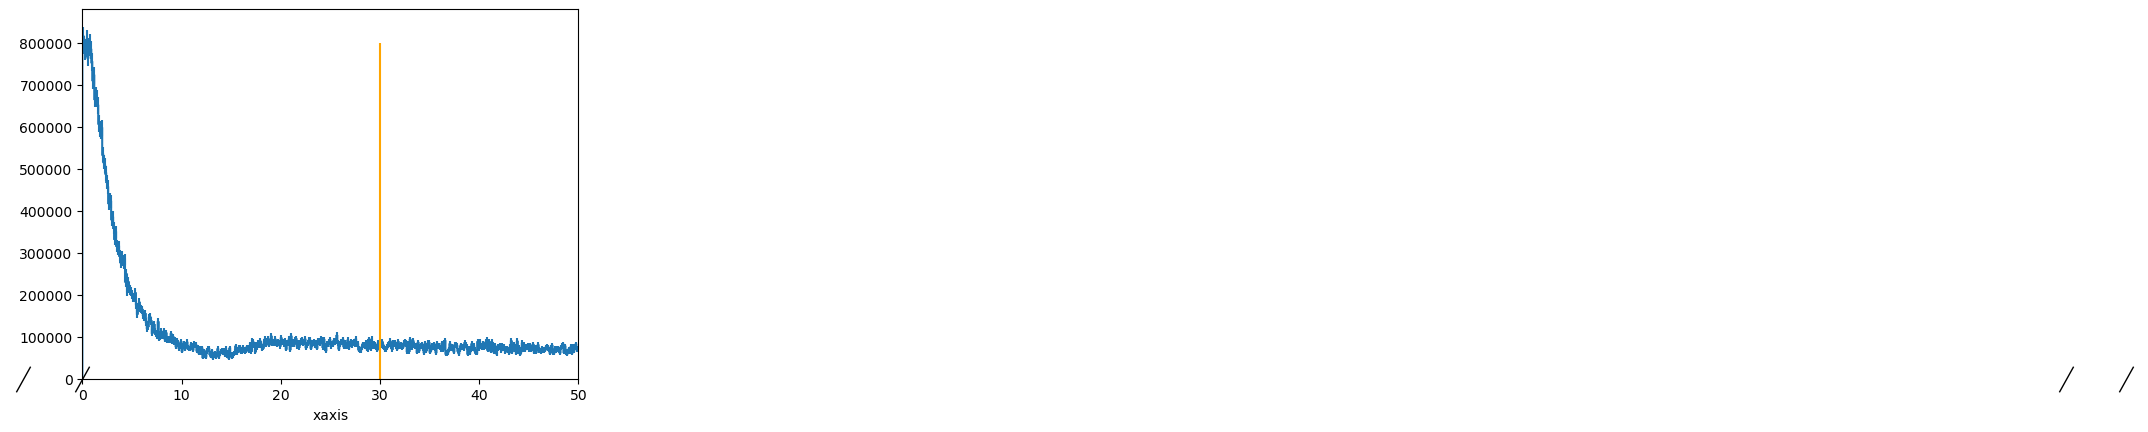

In [49]:
hep.histplot(df['p8_ee_WW_ecm240/missingEnergy'].to_hist())
plt.xlim(0, 50)
plt.vlines(30, 0, 800000, color='orange')
plt.show()

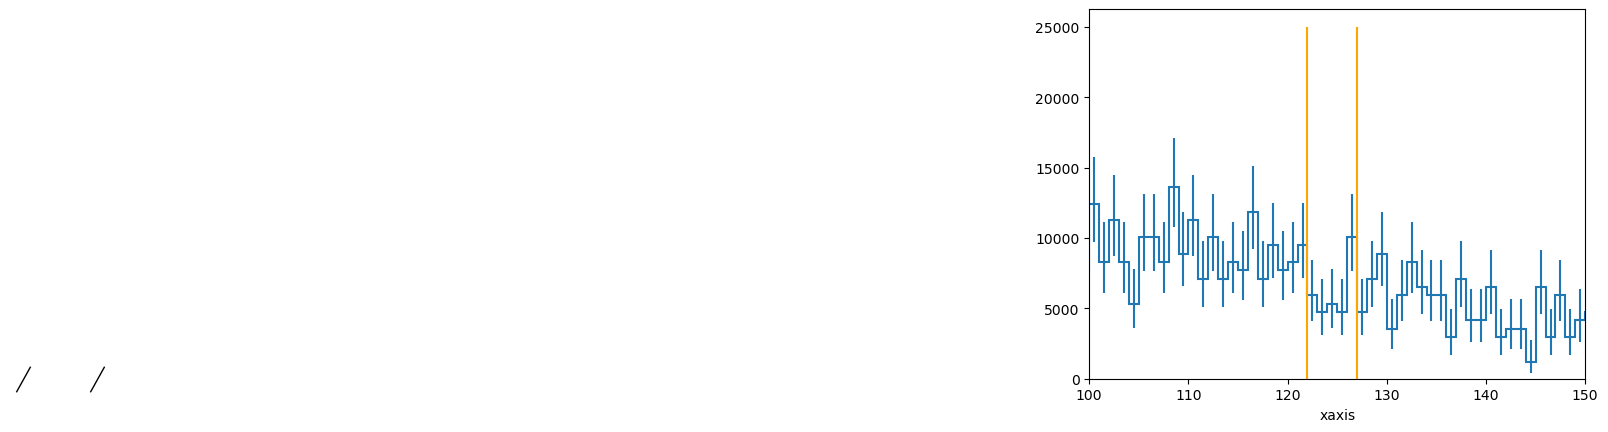

In [50]:
hep.histplot(df['p8_ee_WW_ecm240/mumu_recoil_m_nOne'].to_hist())
plt.xlim(100, 150)
plt.vlines([122, 127], [0, 0], [25000, 25000], colors=['orange', 'orange'])
plt.show()

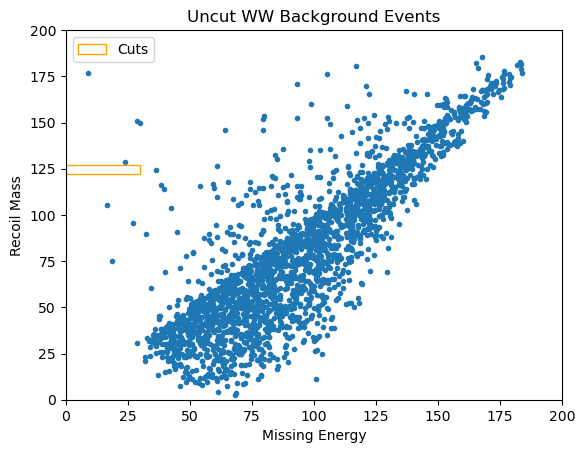

In [55]:
me = df['p8_ee_WW_ecm240/missingEnergy_vs_zmumu_recoil_m'].values()[0]
re = df['p8_ee_WW_ecm240/zmumu_recoil_m_vs_missingEnergy'].values()[0]

plt.scatter(me, re, marker='.')

plt.title("Uncut WW Background Events")
plt.xlabel("Missing Energy")
plt.ylabel("Recoil Mass")

plt.gca().add_patch(Rectangle((0, 122), 30, 5, edgecolor='orange', fill=False, label='Cuts'))

plt.xlim(0, 200)
plt.ylim(0, 200)

plt.legend()
plt.show()